In [1]:
from utils.binaries import *
from utils.plotting import *

LL1 = "/cr/data01/filip/xy-calibration/results/outCorr_16478.txt"
LL6 = "/cr/data01/filip/xy-calibration/results/outCorr_16472.txt"

14:17:05 (   +2.1s) [INFO   ] -- import logging
14:17:05 (  +283ms) [INFO   ] -- import numpy as np
14:17:05 (   +18ms) [INFO   ] -- import uncertainties
14:17:06 (  +826ms) [INFO   ] -- import pandas as pd
14:17:06 (    +2ms) [WARNING] -- pandas support to be dropped at some point!
14:17:06 (    +2ms) [INFO   ] -- import binaries.tools as tools
14:17:07 (  +941ms) [INFO   ] -- import matplotlib.pyplot as plt
14:17:08 (   +1.0s) [INFO   ] -- import seaborn as so
14:17:08 (    +7ms) [INFO   ] -- import plotting.tools as plot
14:17:08 (   +35ms) [DEBUG  ] -- font size set to 9.5
14:17:08 (    +1ms) [DEBUG  ] -- label size set to 13.0
14:17:08 (    +2ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
14:17:08 (    +3ms) [DEBUG  ] -- markersize set to 2.0
14:17:08 (    +4ms) [DEBUG  ] -- usetex set to False


[1.14427962 1.2306142  1.18772478 1.16415467 1.1622451  1.27585305
 1.18034485 1.16000265 1.15825998 1.11055291 1.16274121 1.02951623
 1.13609661 1.13308299 1.12000652 1.0436112  1.18245501 1.20658114
 1.20181801 1.22622677 1.20467896 1.22213414 1.28350334 1.13566382
 1.19219429 1.1411792  1.22816388 1.23264844 1.15875166 1.1987079
 1.16373274 1.08812123 1.13292656 1.1716403  1.0647533  1.16641316
 1.12621214 1.10771391 1.16604195 1.09535302 1.18272736 1.14106987
 1.12165283 1.07460372 1.12321463 1.24013177 1.1620736  1.16205905
 1.14699152 1.13236005 1.15272616 1.18539592 1.14023453 1.17385685
 1.11966459 1.14948974 1.18264406 1.15150645 1.13464108 1.13853203
 1.11466462 1.11416926 1.1584276  1.22421275 1.16315635 1.17079981
 1.15591818 1.24125869 1.16641852 1.21615282 1.23908058 1.13636331
 1.20809155 1.06652703 1.19283273 1.14438107 1.23193392 1.1352555
 1.14987604 1.12372479 1.1373233  1.11950173 1.18424145 1.17713985
 1.1875764  1.22060237 1.14565788 1.11649288 1.32915314 1.355712

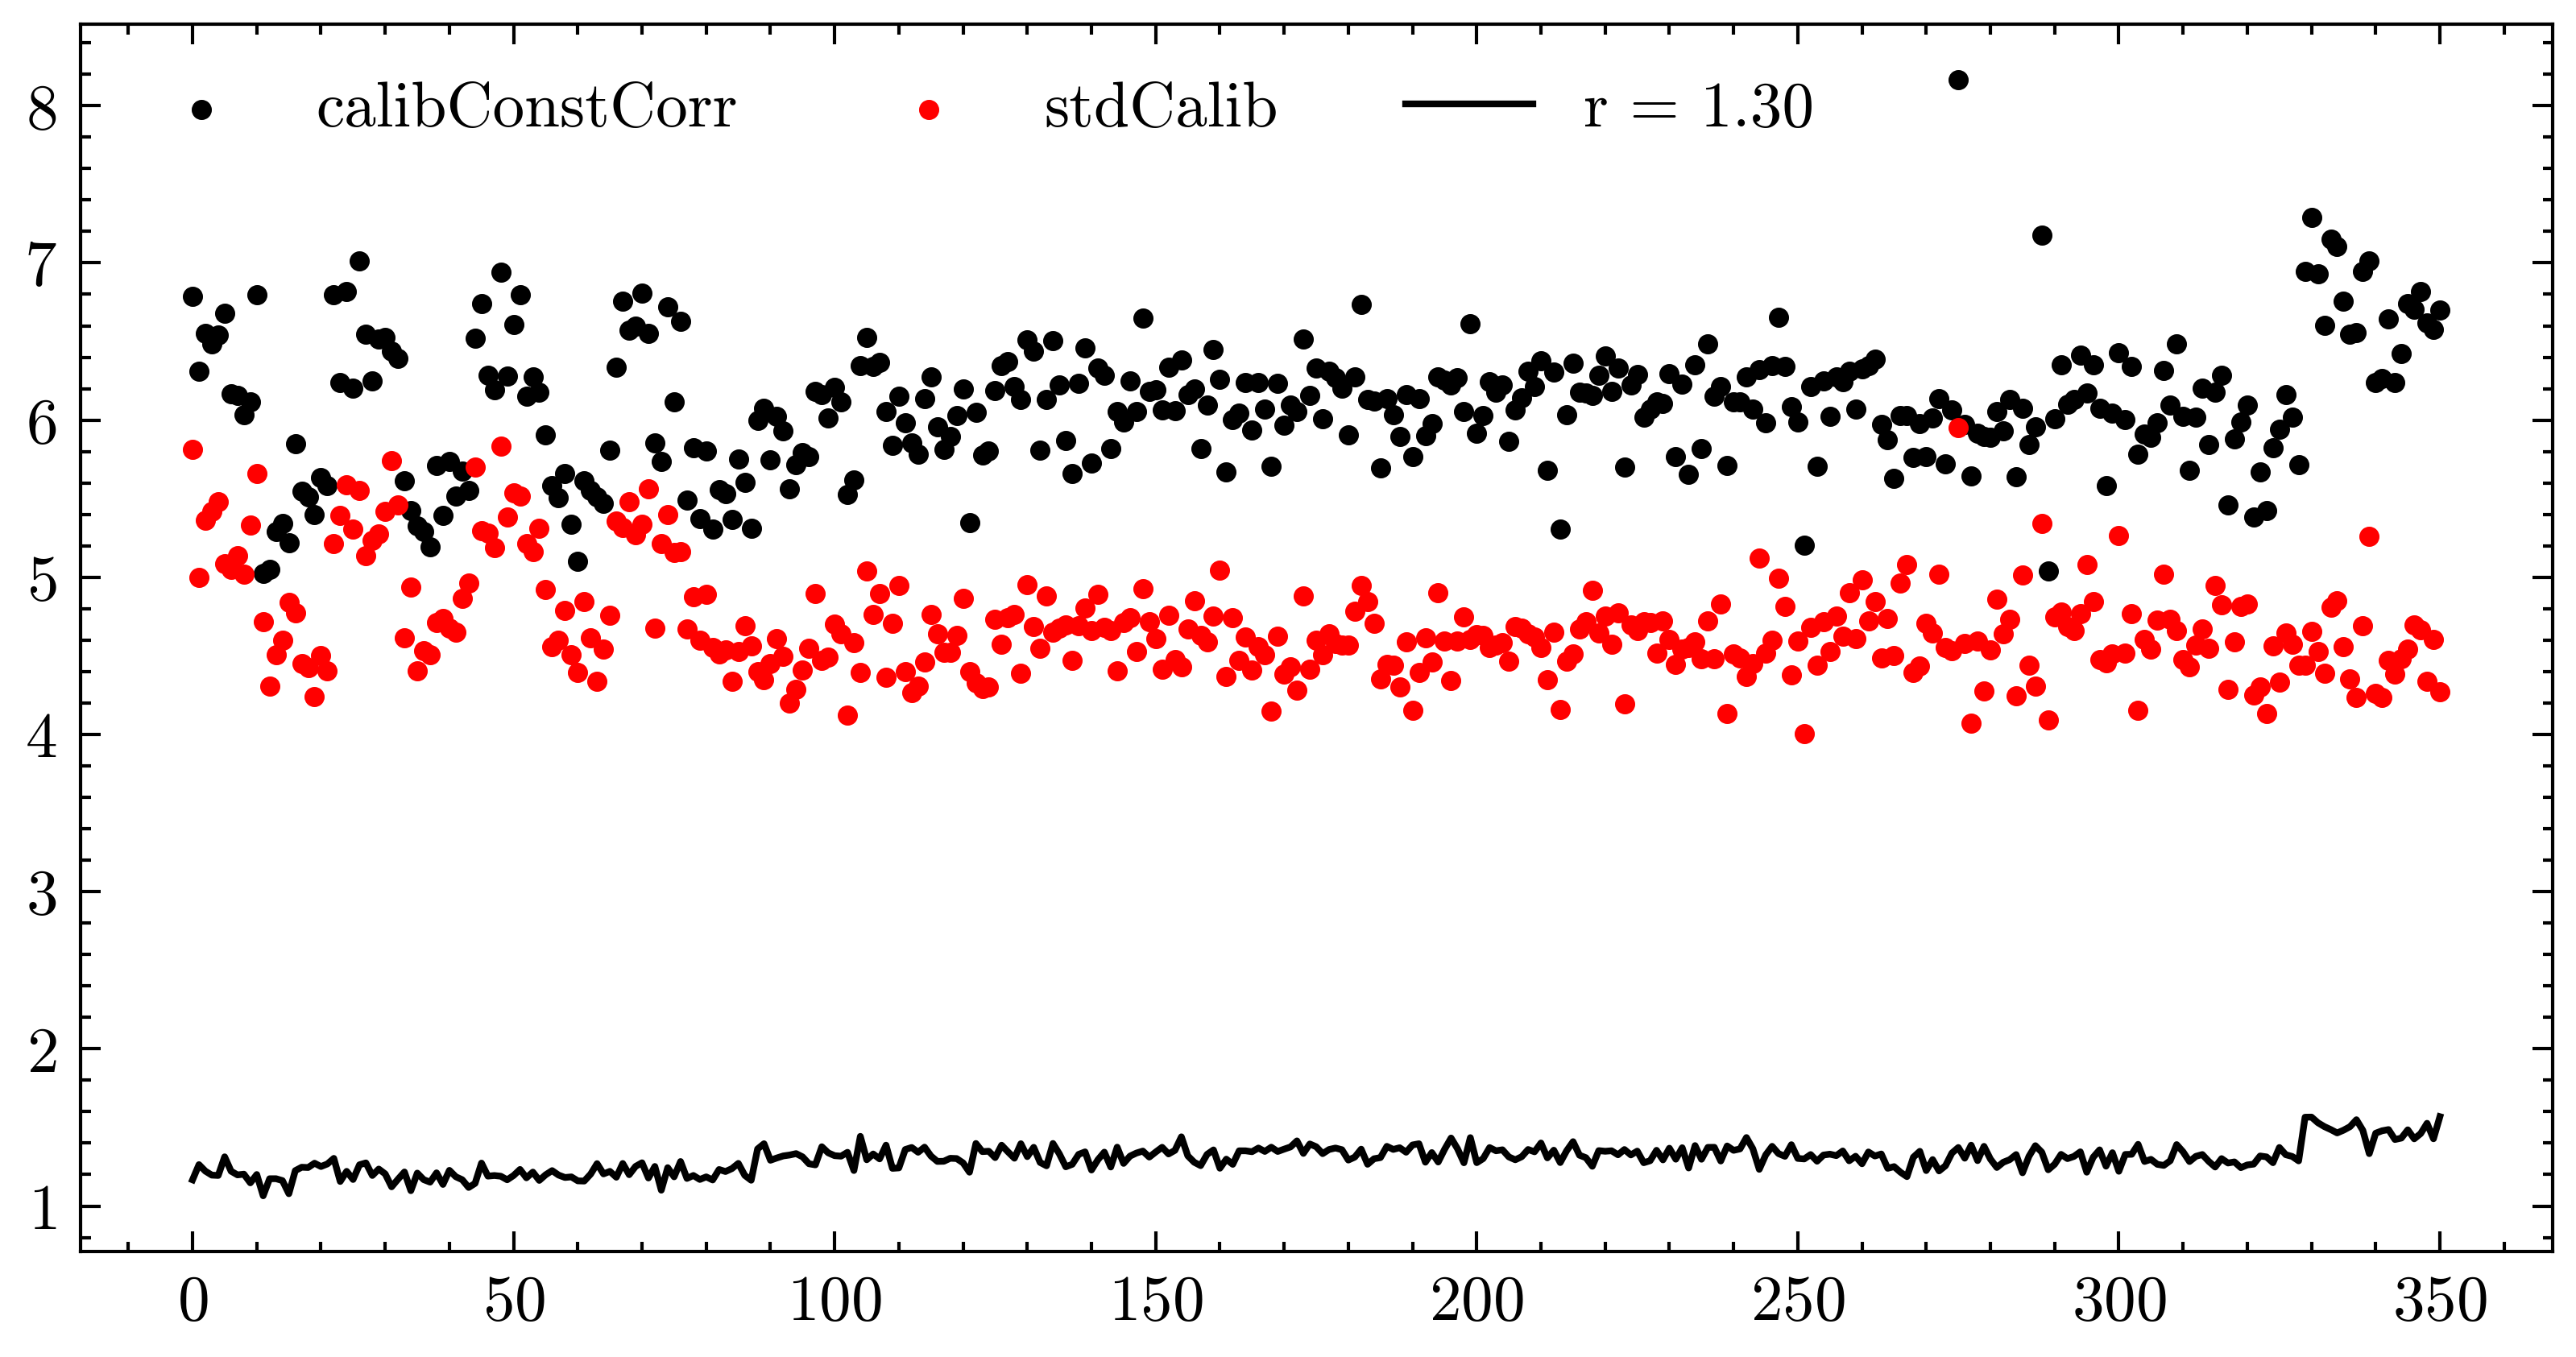

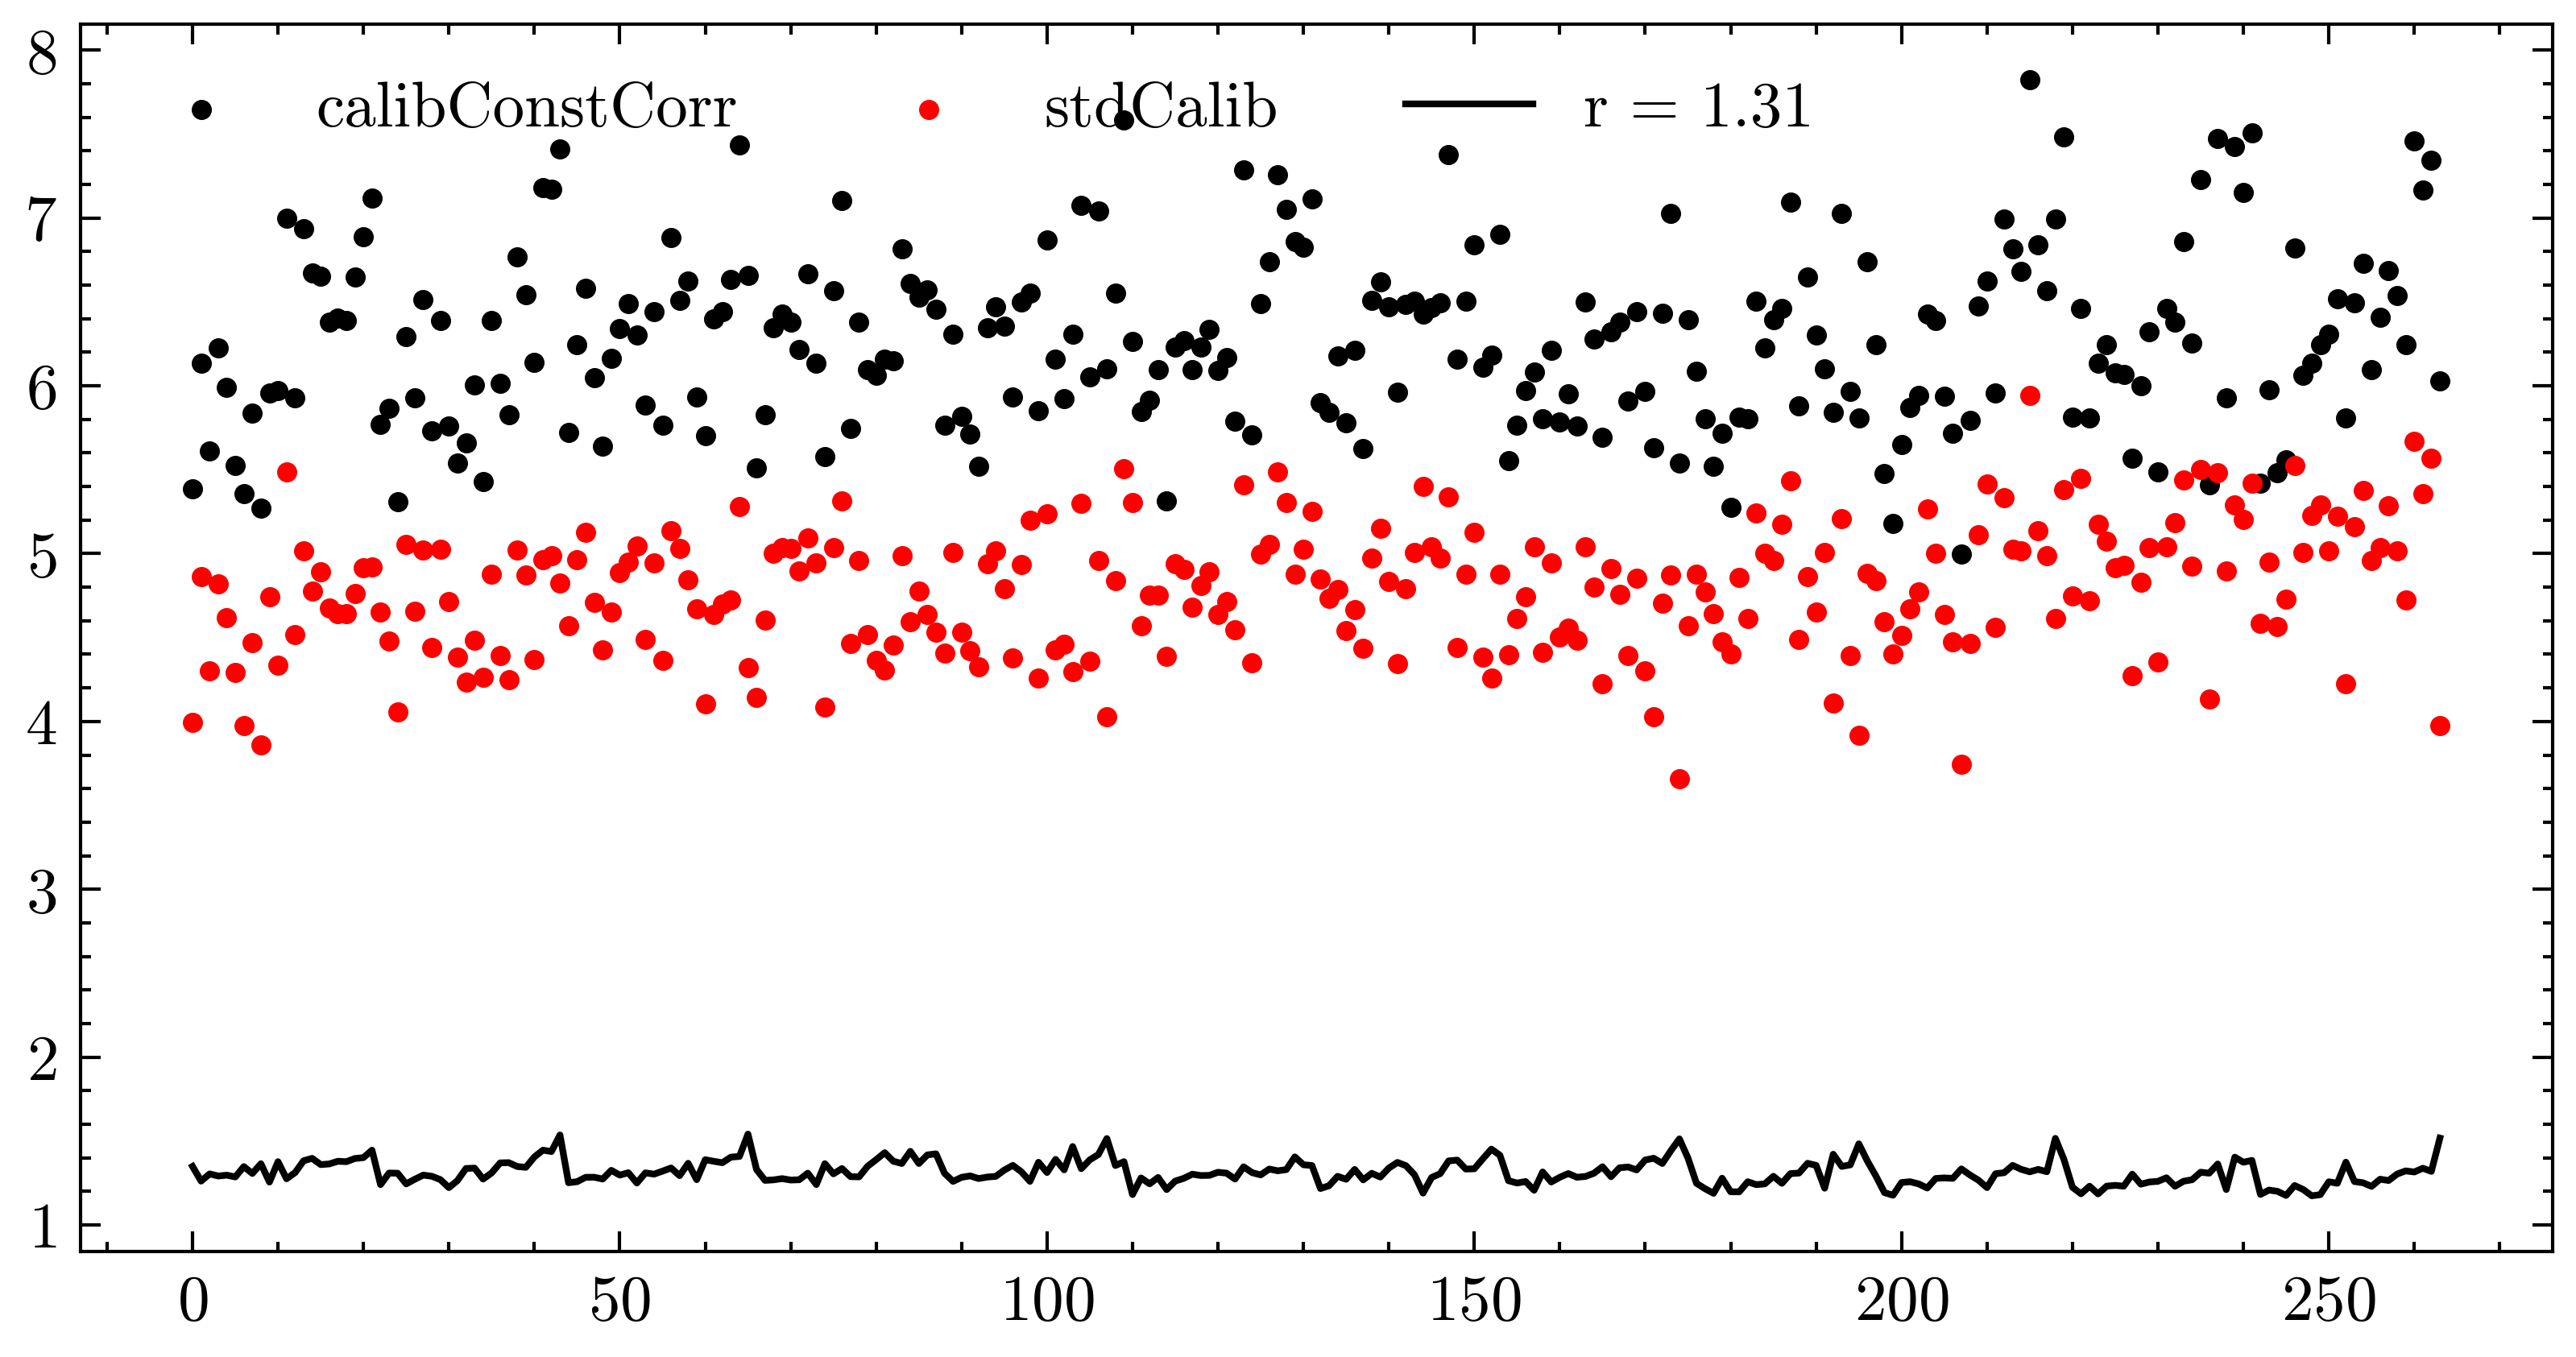

In [35]:
for file, name in zip([LL1, LL6], ['ll1.txt', 'll6-xp3062.txt']):
    calibConst, stdCalib, calibConstCorr = np.loadtxt(file, usecols=[1,3,4], unpack=True)
    pixel_mask = np.loadtxt(f'/cr/data01/filip/xy-calibration/config/pixel_masks/{name}', usecols=[1], dtype=bool)
    pixel_nans = np.logical_and(np.isnan(calibConst), np.isnan(stdCalib), stdCalib==0.)
    pixel_infs = np.logical_and(np.isinf(calibConst), np.isinf(stdCalib))

    if name == 'll1.txt': pixel_nans[297] = True

    pixel_mask = np.logical_and(pixel_mask, ~pixel_nans, ~pixel_infs)
    calibConstCorr = calibConstCorr[pixel_mask]
    calibConst = calibConst[pixel_mask]
    stdCalib = stdCalib[pixel_mask]

    plt.figure()
    plt.scatter(range(len(calibConstCorr)), calibConstCorr, label='calibConstCorr')
    plt.scatter(range(len(stdCalib)), stdCalib, label='stdCalib')

    plt.plot(range(len(calibConstCorr)), calibConstCorr/stdCalib, label=f'r = {np.mean(calibConstCorr/stdCalib):.2f}', marker='none')

    print(calibConst/stdCalib)
    print(calibConstCorr/stdCalib)

    plt.legend(ncol=3)


In [26]:
np.argmax(stdCalib == 0)

297

In [18]:
print(stdCalib)

[5.81579 4.99657 5.36088 5.41867 5.47807 5.08557 5.04916 5.13954 5.01902
 5.33256 5.66218 4.71571 4.30503 4.50854 4.59875 4.8405  4.77367 4.4506
 4.42572 4.24101 4.50442 4.40261 5.2156  5.39429 5.58617 5.30666 5.55307
 5.13513 5.23352 5.27513 5.41651 5.73982 5.46091 4.61232 4.93998 4.40488
 4.53126 4.50861 4.71417 4.74007 4.67653 4.64954 4.86343 4.96557 5.69981
 5.29401 5.2826  5.18706 5.83367 5.38108 5.53507 5.51517 5.21562 5.16074
 5.31051 4.92395 4.55602 4.59888 4.7894  4.50459 4.39691 4.84316 4.6146
 4.33945 4.54233 4.7599  5.35595 5.31728 5.48052 5.26942 5.33728 5.56066
 4.67871 5.21337 5.40038 5.15774 5.16479 4.67286 4.87643 4.5973  4.89378
 4.55098 4.51082 4.53619 4.33594 4.52511 4.68907 4.565   4.39932 4.34905
 4.45209 4.6119  4.49732 4.20004 4.28686 4.41112 4.54633 4.89836 4.47327
 4.49323 4.70293 4.64251 4.12073 4.58367 4.3964  5.04021 4.76237 4.89751
 4.36521 4.7092  4.94966 4.39912 4.26654 4.30877 4.46241 4.76196 4.64235
 4.52471 4.52085 4.63197 4.86379 4.40118 4.32586 4.29